In [2]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Data retrieval and cleaning

In [3]:
df = pd.read_excel('退職予測データ.xlsx','学習データ')

In [76]:
df.head()

,社員ID,退職FLG,部署,役職ランクCD,性別,結婚歴,年齢,雇用形態,勤続年数,勤務先,手当有無,所属子会社名,報酬制度,勤務タイプ,直近1年の残業時間,現ポジションの経過年数
0,1,No,開発,1,男性,結婚,32,3年ごと更新,4.083333,29,あり,ホールディングス,年俸制,客先常駐,82.850,4.083333
1,2,No,開発,1,男性,結婚,41,正社員,2.166667,30,あり,子会社①,年俸制,本社勤務,223.929,0.666667
2,3,No,開発,1,女性,結婚,34,5年ごと更新,4.916667,23,無し,子会社②,年俸制,客先常駐,3.000,4.916667
3,4,No,開発,1,男性,独身,32,3年ごと更新,3.083333,30,無し,子会社①,年俸制,本社勤務,3.250,0.250000
4,5,No,開発,1,男性,結婚,29,1年ごと更新,0.500000,2,あり,子会社①,年俸制,本社勤務,0.000,0.500000


In [5]:
cols_eng = 'employee ID,Retirement FLG,Department,Job rank CD,sex,marital status,age,Employment status,Length of service,workplace,allowance,Affiliated subsidiary name,Compensation system,work type,Overtime hours in the last year,Number of years in current position'.split(',')
cols_eng = [col.replace(" ","_").lower() for col in cols_eng]
cols_jp = [col for col in df.columns]
cols_dict = {}
for idx, col in enumerate(cols_eng):
    cols_dict[col] = cols_jp[idx]
cols_dict
df.columns = cols_eng
df.head()


,employee_id,retirement_flg,department,job_rank_cd,sex,marital_status,age,employment_status,length_of_service,workplace,allowance,affiliated_subsidiary_name,compensation_system,work_type,overtime_hours_in_the_last_year,number_of_years_in_current_position
0,1,No,開発,1,男性,結婚,32,3年ごと更新,4.083333,29,あり,ホールディングス,年俸制,客先常駐,82.850,4.083333
1,2,No,開発,1,男性,結婚,41,正社員,2.166667,30,あり,子会社①,年俸制,本社勤務,223.929,0.666667
2,3,No,開発,1,女性,結婚,34,5年ごと更新,4.916667,23,無し,子会社②,年俸制,客先常駐,3.000,4.916667
3,4,No,開発,1,男性,独身,32,3年ごと更新,3.083333,30,無し,子会社①,年俸制,本社勤務,3.250,0.250000
4,5,No,開発,1,男性,結婚,29,1年ごと更新,0.500000,2,あり,子会社①,年俸制,本社勤務,0.000,0.500000


In [7]:
cols_to_drop = ['employee_id']
df = df[[col for col in df.columns if col not in cols_to_drop]].copy()
df.head()
df_copy = df.copy()

In [8]:
df.retirement_flg = df.retirement_flg.apply(lambda x: 1 if x=='Yes' else 0)
df.allowance = df.allowance.apply(lambda x: 1 if x=='あり' else 0)
df.head()

,retirement_flg,department,job_rank_cd,sex,marital_status,age,employment_status,length_of_service,workplace,allowance,affiliated_subsidiary_name,compensation_system,work_type,overtime_hours_in_the_last_year,number_of_years_in_current_position
0,0,開発,1,男性,結婚,32,3年ごと更新,4.083333,29,1,ホールディングス,年俸制,客先常駐,82.850,4.083333
1,0,開発,1,男性,結婚,41,正社員,2.166667,30,1,子会社①,年俸制,本社勤務,223.929,0.666667
2,0,開発,1,女性,結婚,34,5年ごと更新,4.916667,23,0,子会社②,年俸制,客先常駐,3.000,4.916667
3,0,開発,1,男性,独身,32,3年ごと更新,3.083333,30,0,子会社①,年俸制,本社勤務,3.250,0.250000
4,0,開発,1,男性,結婚,29,1年ごと更新,0.500000,2,1,子会社①,年俸制,本社勤務,0.000,0.500000


# EDA

## Potential Questions:  
1. How many years until a certain employee retire?
2. What is the probability that a certain employee will retire in X year?
3. What are the contributing factors to retirement?

In [9]:
df.department.value_counts()

開発         1504
営業          106
バックオフィス      85
Name: department, dtype: int64

In [81]:
def bar_chart(col_name, bar_w=2, graph_h=7):
    count = df[col_name].value_counts()
    x_labels = [val for val in count.index]
    fig, ax = plt.subplots(figsize=(len(x_labels)*bar_w, graph_h))
    ax.bar(count.index, count.values)
    ax.set_xticklabels(x_labels, fontname='MS Gothic')
    plt.show()

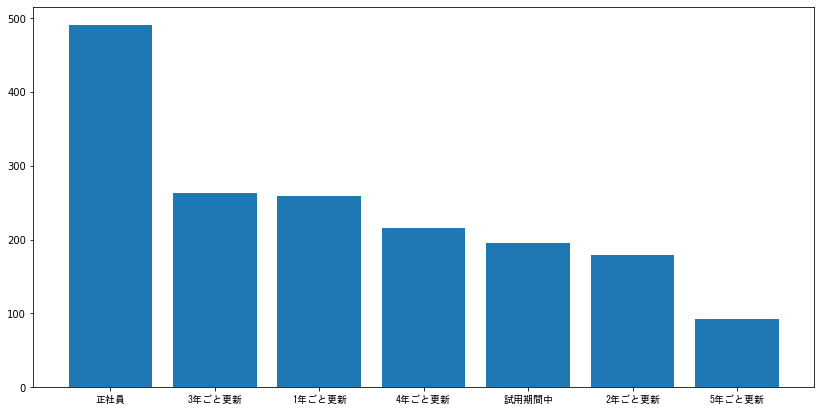

In [82]:
bar_chart('employment_status',2,7)

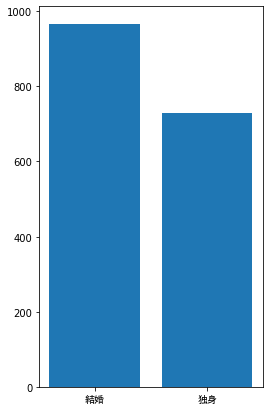

In [83]:
bar_chart('marital_status')

In [12]:
TARGET = 'retirement_flg'
num_cols = [col for col in df.columns if df[col].dtype != object and col != TARGET]
cat_cols = [col for col in df.columns if col not in num_cols and col != TARGET]

cat_cols

['department',
 'job_rank_cd',
 'sex',
 'marital_status',
 'employment_status',
 'affiliated_subsidiary_name',
 'compensation_system',
 'work_type']

In [85]:
df[df.retirement_flg==0].department.unique()

array(['開発', 'バックオフィス', '営業'], dtype=object)

In [14]:
a = df.employment_status.value_counts()
'正社員' in a.index

True

In [15]:
def multi_bar_chart(col, bar_w=0.35, graph_h=7, type='grouped', val_type='count'):
    labels = df[col].unique()
    retired_temp = df[df.retirement_flg==1][col].value_counts()
    not_retired_temp = df[df.retirement_flg==0][col].value_counts()

    if val_type == 'percent':
        count_all=df[col].value_counts()
        retired = [0 if label not in retired_temp.index else retired_temp[label] / count_all[label] for label in labels]
        not_retired = [0 if label not in not_retired_temp.index else not_retired_temp[label] / count_all[label] for label in labels]
    else:
        retired = [0 if label not in retired_temp.index else retired_temp[label]  for label in labels]
        not_retired = [0 if label not in not_retired_temp.index else not_retired_temp[label] for label in labels]


    x = np.arange(len(labels))  # the label locations
    width = bar_w  # the width of the bars

    fig, ax = plt.subplots(figsize=(len(labels)*1.5, graph_h))
    if type=='grouped':
        rects1 = ax.bar(x - width/2, retired, width, label='Retired')
        rects2 = ax.bar(x + width/2, not_retired, width, label='Not Retired')
    if type=='stacked':
        rects1 = ax.bar(x, retired, width, label='Retired')
        rects2 = ax.bar(x, not_retired, width, bottom=retired, label='Not Retired')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Count')
    ax.set_title(f'Count retired and not-retired by {col}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontname='MS Gothic')
    ax.legend()

    fig.tight_layout()

    plt.show()

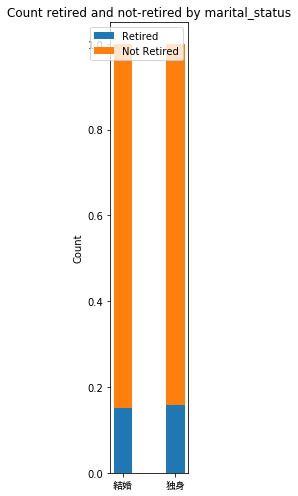

In [17]:
multi_bar_chart('marital_status',0.35, 7, "stacked", "percent")

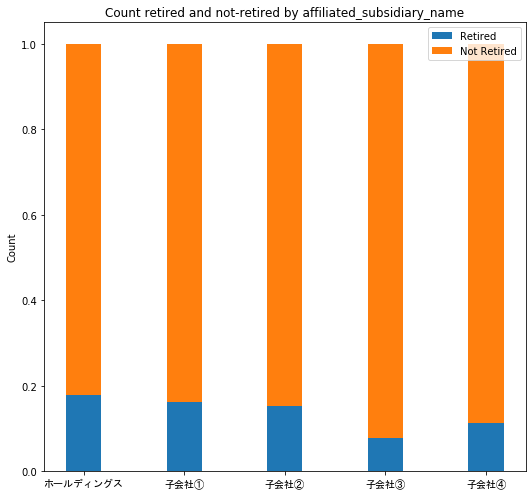

In [18]:
multi_bar_chart('affiliated_subsidiary_name', 0.35, 7, 'stacked', 'percent')

In [90]:
print('Median')
print(df.groupby('retirement_flg')['number_of_years_in_current_position'].median())
print('Mean')
print(df.groupby('retirement_flg')['number_of_years_in_current_position'].mean())

Median
retirement_flg
0    1.458333
1    1.250000
Name: number_of_years_in_current_position, dtype: float64
Mean
retirement_flg
0    2.591527
1    2.793103
Name: number_of_years_in_current_position, dtype: float64


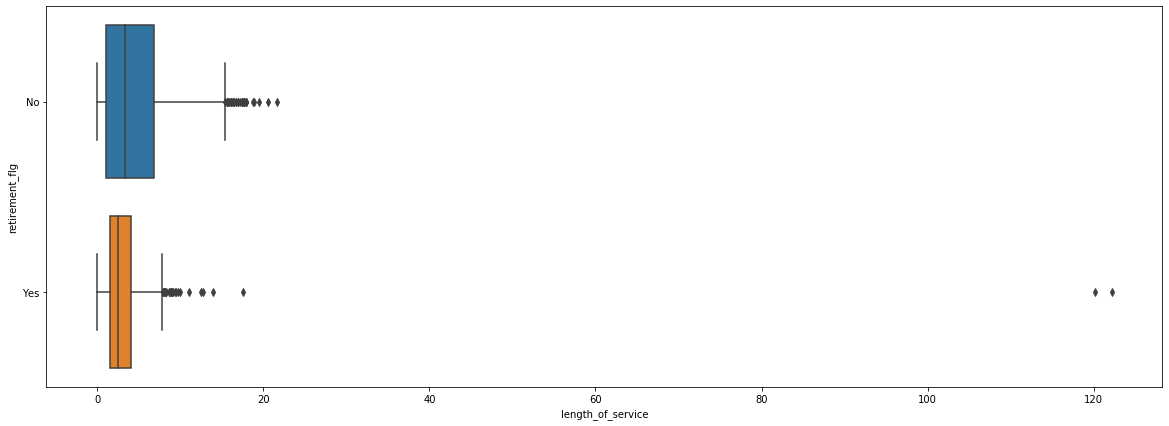

In [99]:
fig, ax = plt.subplots(figsize=(20,7))
sns.boxplot(data=df_copy, x="length_of_service", y="retirement_flg", ax=ax)

In [97]:
df.describe()

,retirement_flg,age,length_of_service,workplace,allowance,overtime_hours_in_the_last_year,number_of_years_in_current_position
count,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000
mean,0.153982,33.568732,4.375764,24.979351,0.384661,110.784232,2.622566
std,0.361038,6.900616,5.600409,9.347303,0.486659,129.318345,5.135841
min,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,1.166667,26.000000,0.000000,0.000000,0.583333
50%,0.000000,32.000000,3.166667,29.000000,0.000000,64.912000,1.416667
75%,0.000000,37.000000,6.416667,30.000000,1.000000,174.000000,3.000000
max,1.000000,64.000000,122.166667,39.000000,1.000000,629.150000,122.166667


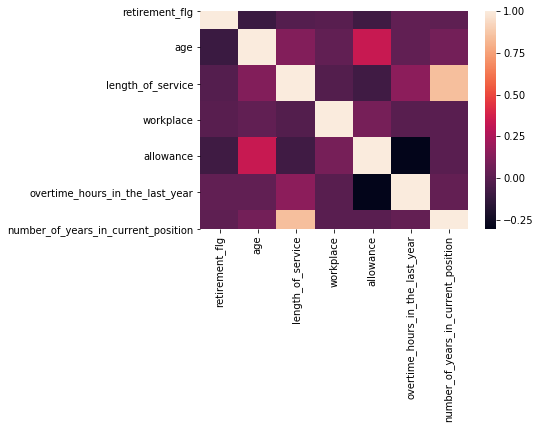

In [101]:
sns.heatmap(df.corr())

In [93]:
#TODO:
# Create new feature: years from contract renewal based on employment status and year in current position
# Create past version of people as new data points

# Modelling

In [104]:
#Testing a model
df_encoded = pd.get_dummies(df)

TARGET = 'retirement_flg'
FEATURES = [col for col in df_encoded.columns if col != TARGET]

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded[FEATURES], df_encoded[TARGET], test_size=0.3, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 51.080550098231825
